<a href="https://colab.research.google.com/github/ambitiousyash/Dynamic-Forecasting-Models-Integrating-Python-and-NLP/blob/main/Dynamic%20forecasting%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [7]:
df.shape

(847, 2)

In [8]:
print(f"Date range of gold prices available from -{df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")

Date range of gold prices available from -1950-01 to 2020-07


In [9]:
date = pd.date_range(start='1/1/1950', end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [10]:
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


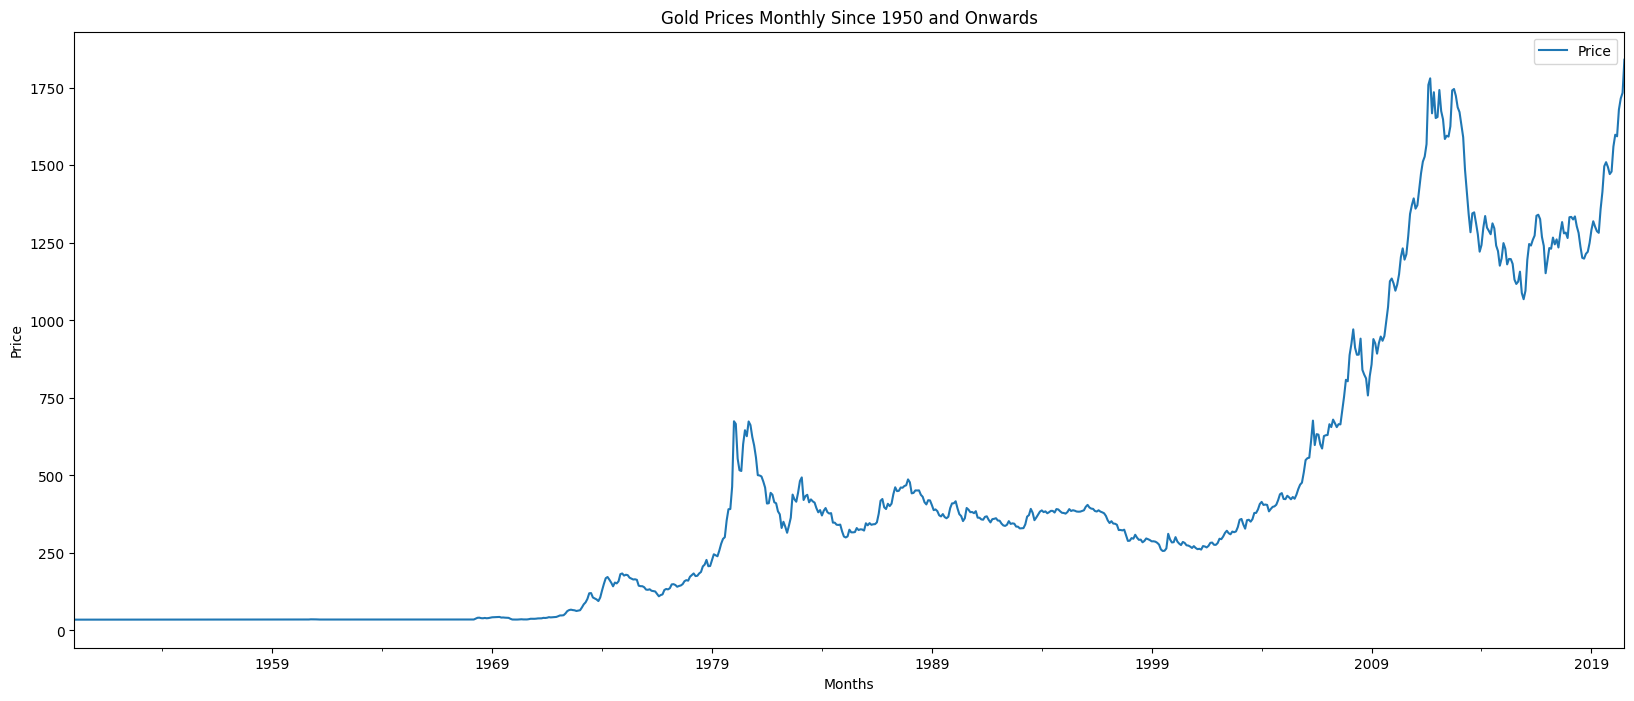

In [11]:
df.plot(figsize=(20, 8))
plt.title("Gold Prices Monthly Since 1950 and Onwards")
plt.xlabel("Months")
plt.ylabel("Price")
plt.show()

In [12]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


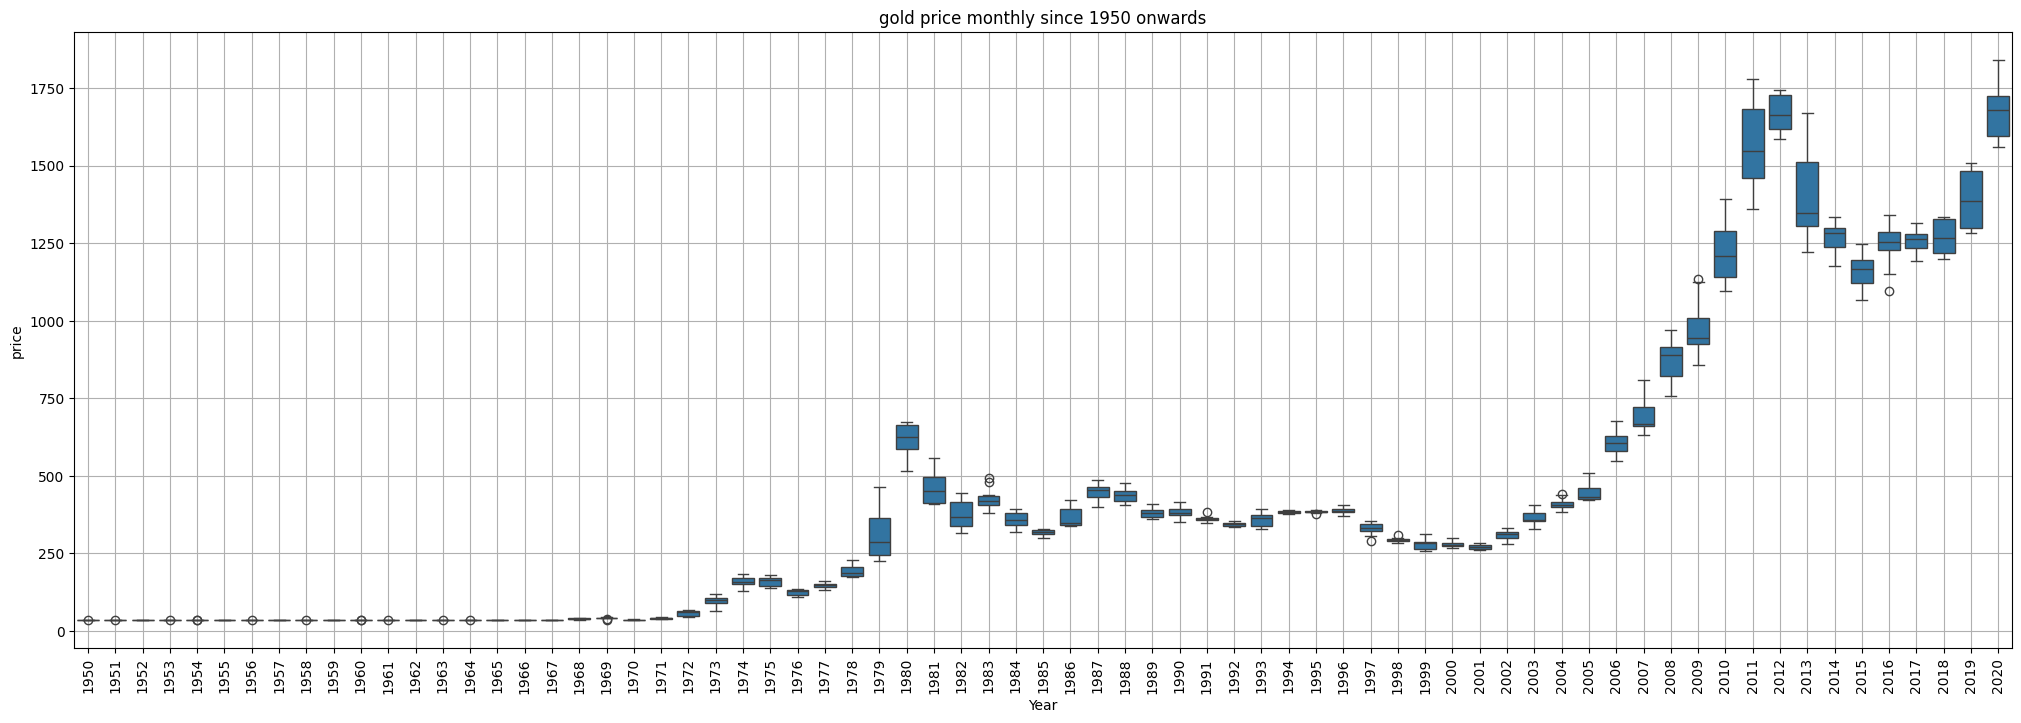

In [13]:
_, ax= plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year, y=df.values[:, 0], ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('Year')
plt.ylabel("price")
plt.xticks(rotation=90)
plt.grid()

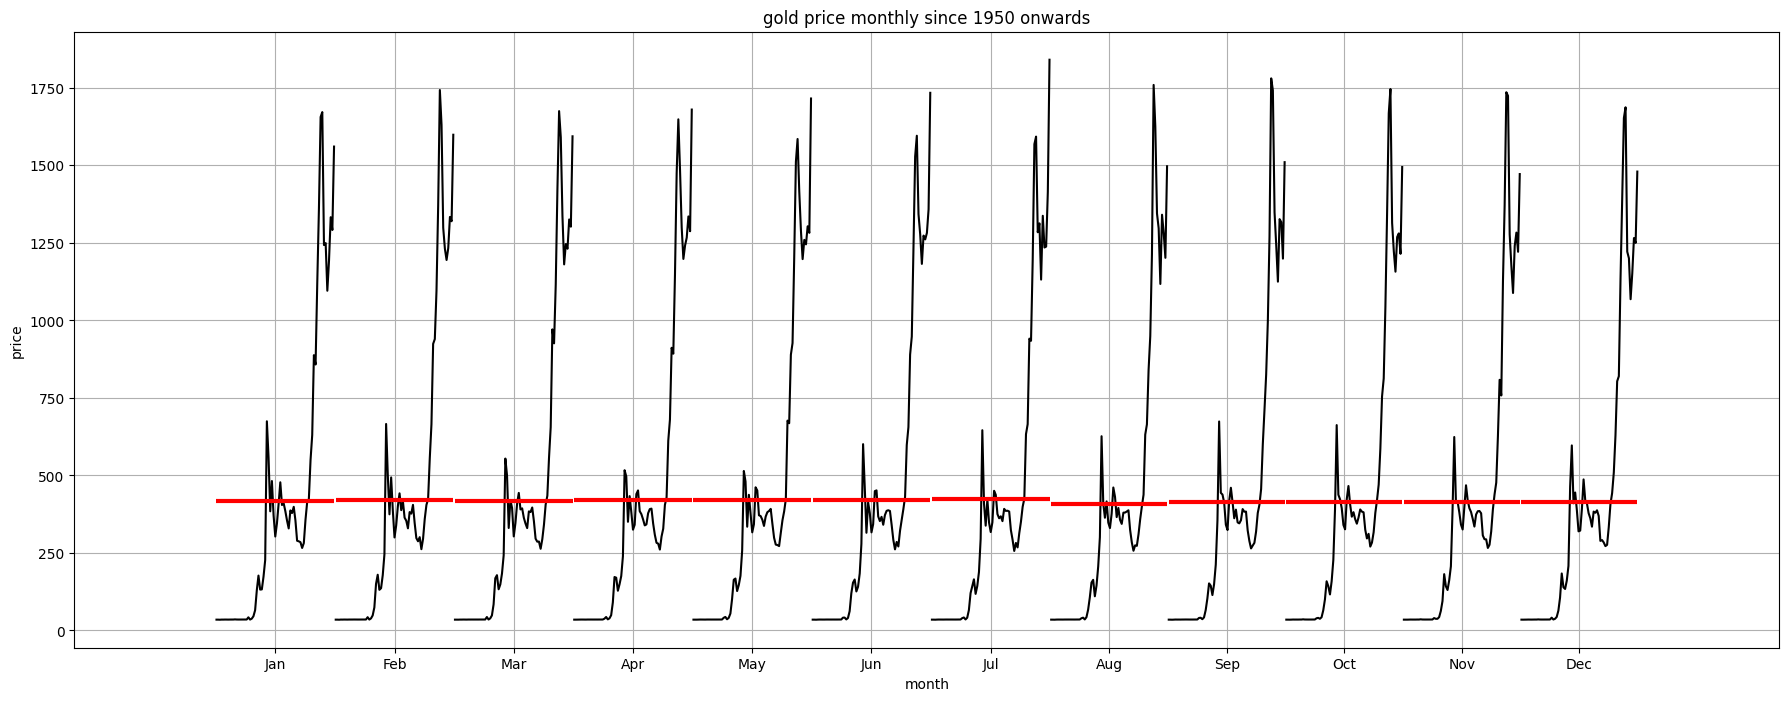

In [14]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax= plt.subplots(figsize=(22,8))
month_plot(df,ylabel='gold price',ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

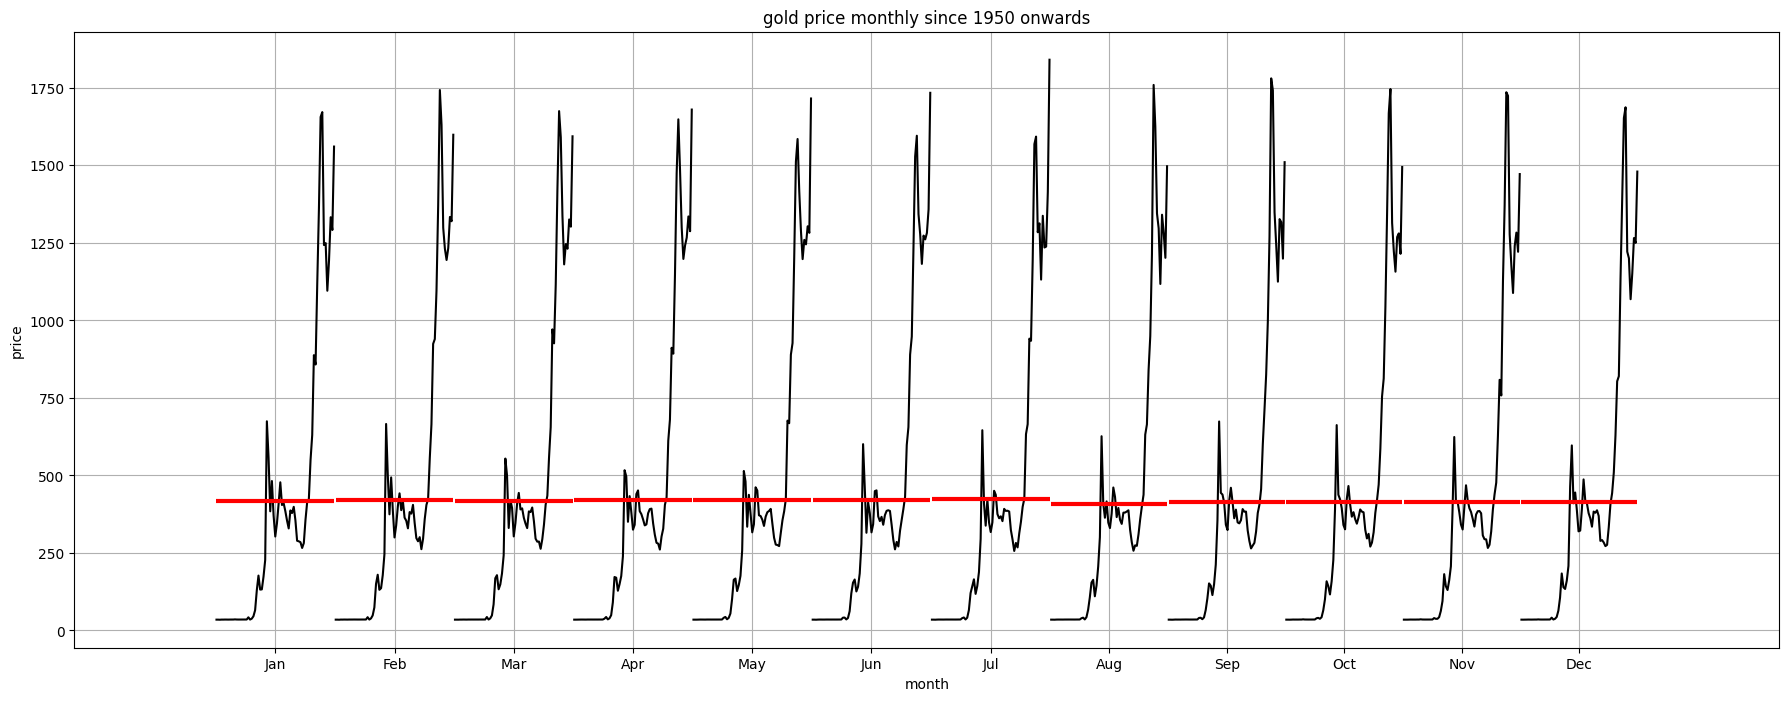

In [15]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax= plt.subplots(figsize=(22,8))
month_plot(df,ylabel='gold price',ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

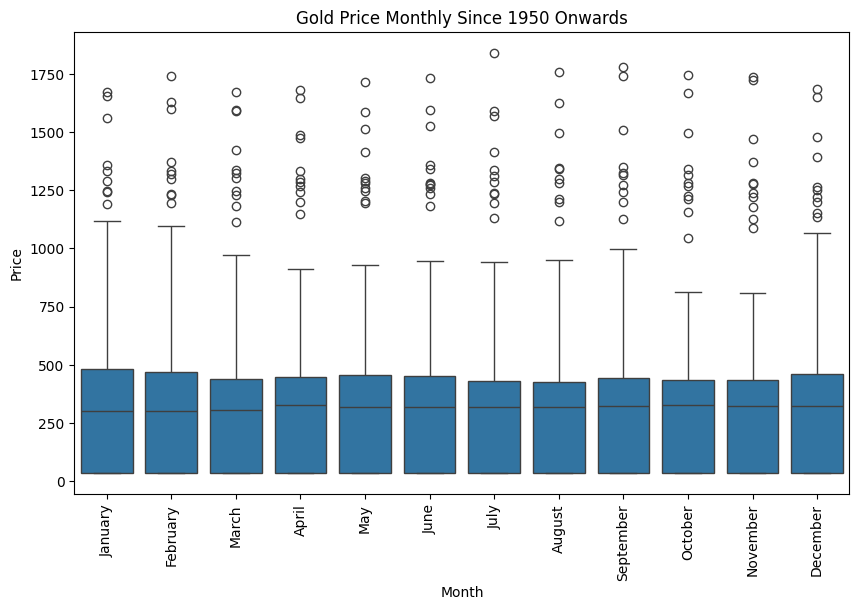

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Your boxplot code
sns.boxplot(x=df.index.month_name(), y=df.values[:, 0], ax=ax)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Gold Price Monthly Since 1950 Onwards')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

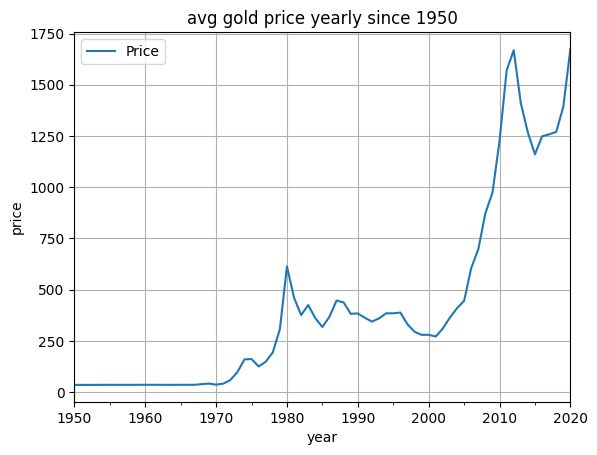

In [17]:
df_yearly_sum =df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid()

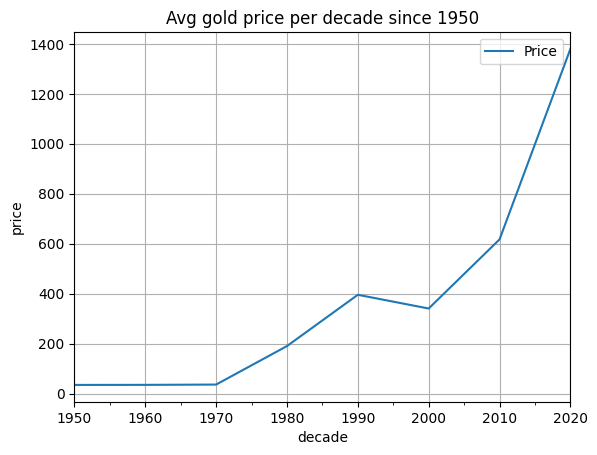

In [18]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [19]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['std']) / df_1["Mean"] * 100).round(2)
df_1.head()

,Mean,std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


In [20]:
print(df_1.columns)

Index(['Mean', 'std', 'Cov_pct'], dtype='object')


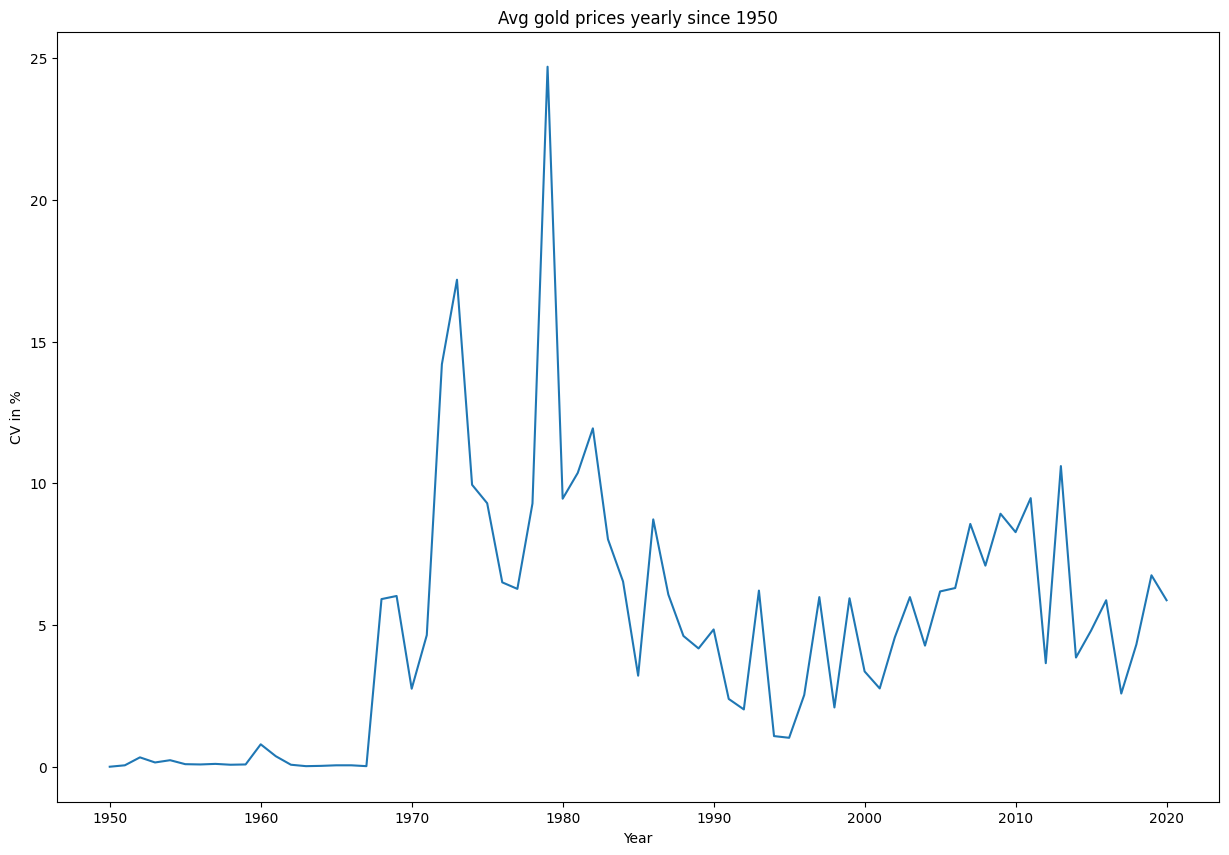

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
df_1['Cov_pct'].plot()
plt.title("Avg gold prices yearly since 1950")
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.show()

In [22]:
train = df[df.index.year <=2015]
test = df[df.index.year>2015]

In [23]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


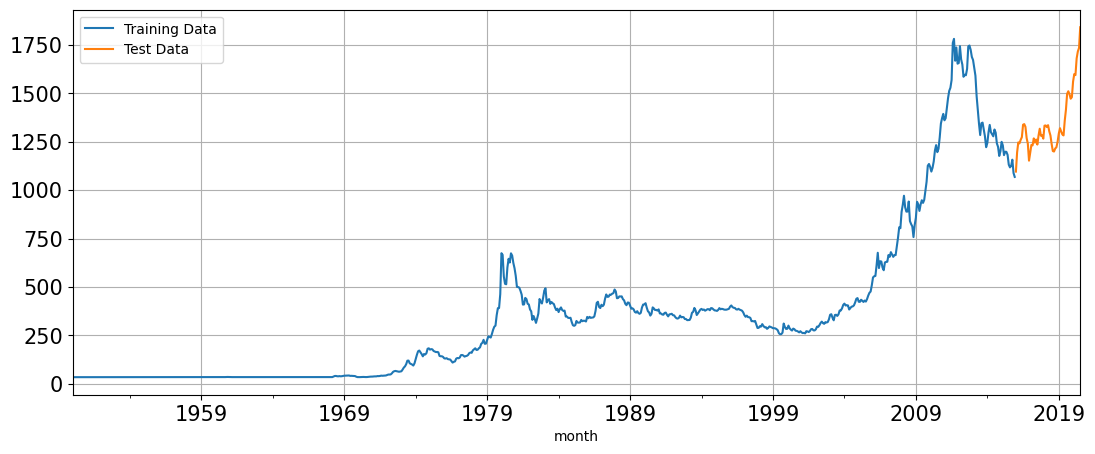

In [24]:
train['Price'].plot(figsize=(13,5),fontsize=15)
test['Price'].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show();

In [25]:
train_time =[i+1 for i in range(len(train))]
test_time=[i+len(train) for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [26]:
LR_train= train.copy()
LR_test = test.copy()

In [27]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [28]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

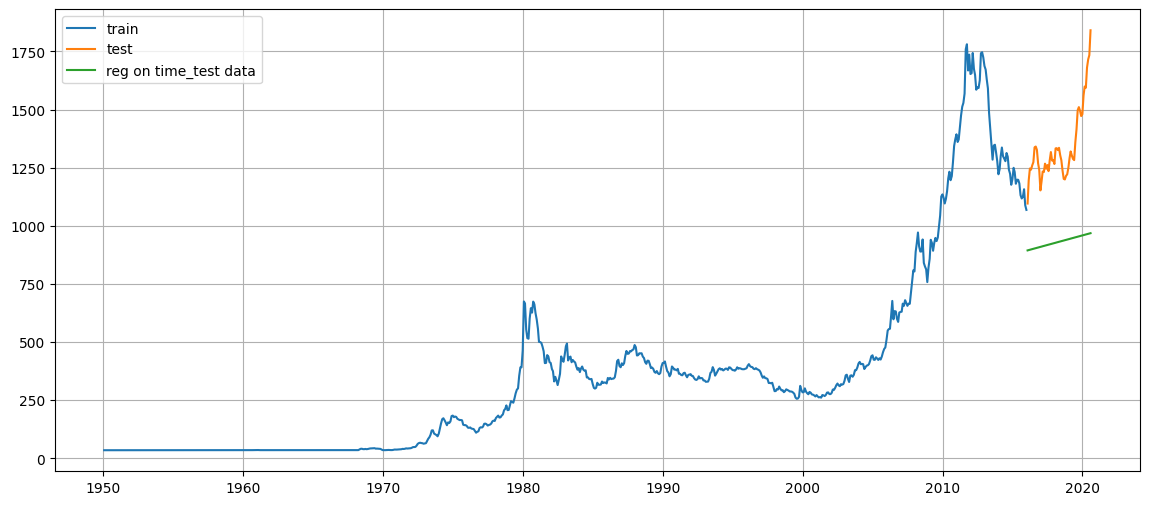

In [29]:
test_predictions_model1=lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1
plt.figure(figsize =(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label = 'reg on time_test data')
plt.legend(loc ='best')
plt.grid();

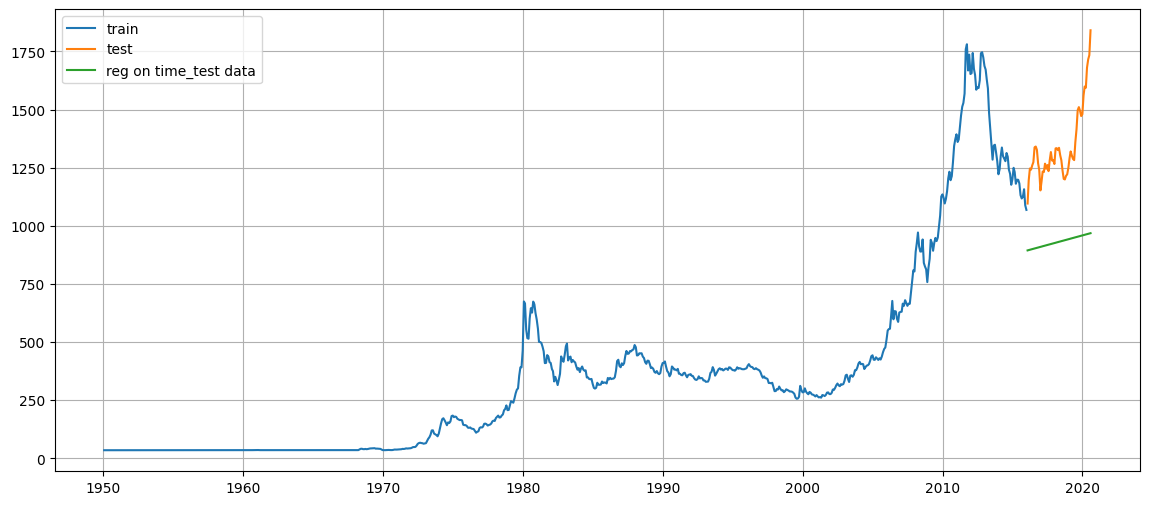

In [30]:
test_predictions_model1=lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1
plt.figure(figsize =(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label = 'reg on time_test data')
plt.legend(loc ='best')
plt.grid();

In [31]:
def mape(actual,pred):
    return round((np.mean(abs(actual-pred)/actual))*100,2)

In [32]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("Mape is %3.3f"%(mape_model1_test),"%")

Mape is 29.860 %


In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

final_model = ExponentialSmoothing(df,
                                    trend='additive',
                                    seasonal='additive').fit(smoothing_level=0.4,
                                                         smoothing_slope=0.3,
                                                         smoothing_seasonal=0.6)

In [34]:
Mape_final_model = mape(df['Price'].values,final_model.fittedvalues)
print("Mape",Mape_final_model)

Mape 17.24


In [35]:
predictions = final_model.forecast(steps=len(test))

In [36]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof=1)})

pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1901.022009
2020-09-30,1615.306077,1723.457050,1831.608022
2020-10-31,1538.567922,1646.718895,1754.869867
2020-11-30,1476.758600,1584.909572,1693.060545
2020-12-31,1459.327290,1567.478262,1675.629235


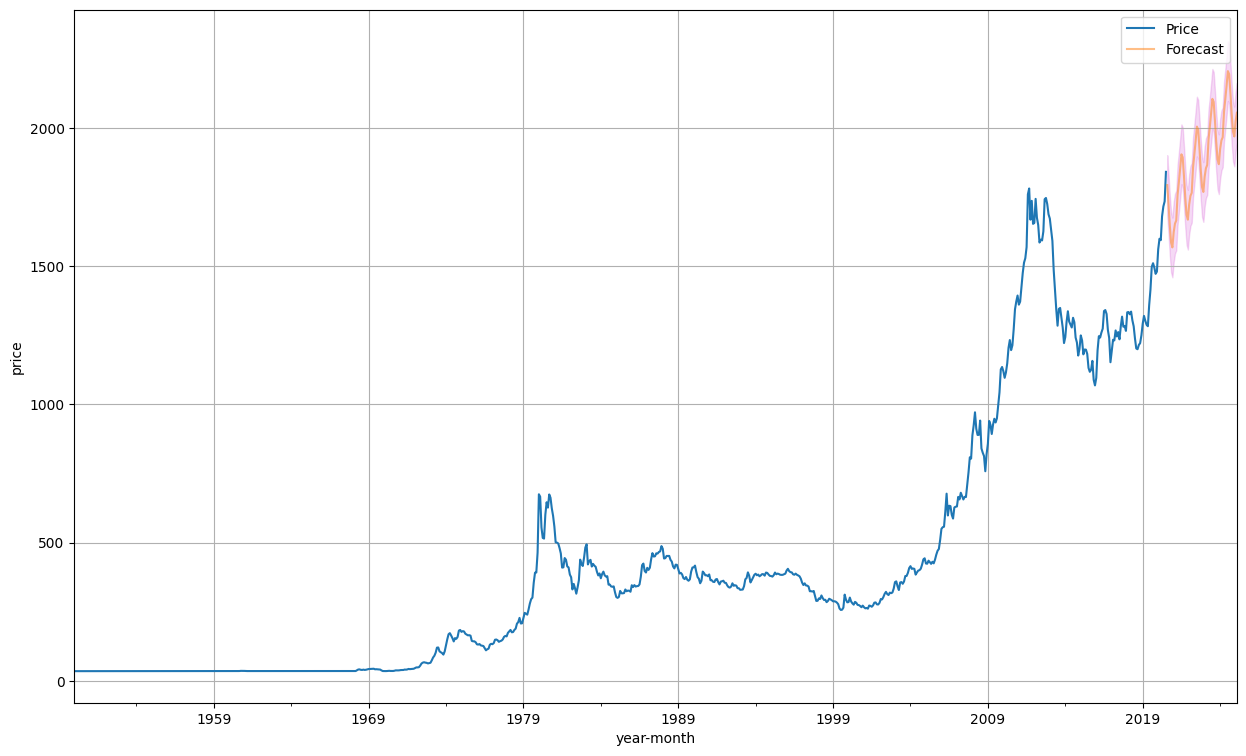

In [37]:
import matplotlib.pyplot as plt

ax = df.plot(label='Actual', figsize=(15, 9))
pred_df['prediction'].plot(ax=ax, label='Forecast', alpha=0.5)
ax.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=0.15)
ax.set_xlabel('year-month')
ax.set_ylabel("price")
plt.legend(loc="best")
plt.grid()
plt.show()